# NumPy I: Basics

*Disclaimer: The contents of this notebook are developped according to Python Data Science Handbook, by Jake VanderPlas and Python for Data Analysis, by Wes McKinney*

NumPy (short for Numerical Python) is a Python library used for working with arrays. NumPy provides an efficient interface to store and operate on dense data buffers. In some ways, NumPy arrays are like Python's built-in `list` type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size. NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python.

Below are some useful features you will find in NumPy
- ndarray, an efficient multidimensional array providing fast array-oriented arithmetic operations and flexible broadcasting capabilities
- Mathematical functions for fast operations on entire arrays of data without having to write loops

By convention, you will import NumPy using `np` as an alias

In [4]:
import numpy as np
np.__version__

'1.24.3'

Using `from numpy import *` can avoid having to write `np`. However, you should avoid using this syntax. The NumPy namespace is large and contains a number of functions whose names conflict with built-in Python functions (such as `min` and `max`)

### Python's Built-in Array
Since Python 3.3, Python provides the built-in array module to be used to create dense arrays of a uniform type

In [1]:
import array
s = list(range(10))
arr = array.array('i', s)
arr

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
type(arr)

In [ ]:
s

### NumPy Array
In Python we have lists that serve the purpose of arrays, but they are slow to process. NumPy aims to provide an array object that is up to 50x faster than traditional Python lists. The difference between a dynamic-type list and a fixed-type (NumPy-style) array is illustrated in the following figure 

<div>
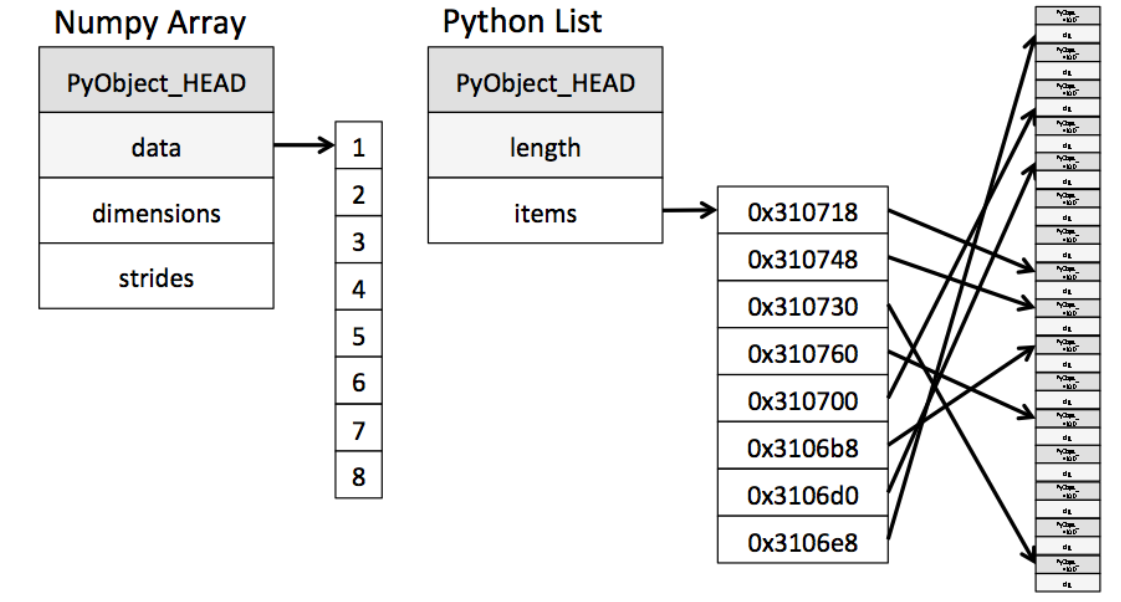
</div>

While Python's array object provides efficient storage of array-based data, NumPy adds to this efficient operations on that data. The array object in NumPy is called `ndarray`, it provides a lot of supporting functions that make working with `ndarray` very easy.

In [2]:
# Python built-in array does not have the broadcast capability as the NumPy array
arr * 3

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
list1 = [1, 2, 3, 4, 5, 6]
list1 * 3

In [ ]:
[3 * x for x in list1]

In [ ]:
for i in range(len(arr)):
    arr[i] = arr[i] * 3
    
arr

#### Python List vs. NumPy Array

NumPy internally stores data in a **contiguous** block memory, independent of other built-in Python objects. NumPy's library of algoritms written in the C language can operate on this memory without any type checking. NumPy arrays also use much less memory than built-in Python sequences.

To give you an idea of the performance difference, consider a NumPy array of one million integers and the equivalent Python list
- CPU time - the time actually spent by CPU executing method code
- Wall time - the real-world time elapsed between a pair of events, e.g. between method entry and method exit

In [7]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [6]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 10.8 ms, sys: 12.1 ms, total: 22.8 ms
Wall time: 30.6 ms


In [ ]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

NumPy based algorithms are generally 10 to 100 times faster than their pure Python counterparts and use significantly less memory

In [ ]:
import time
array_size = 100000
python_list1 = range(array_size)
python_list2 = range(array_size)

start_time = time.time()
python_multiplication = [(n1 * n2) for n1, n2 in zip(python_list1, python_list2)]
print(f'Python multiplication time used: {time.time() - start_time}') 

np_array1 = np.arange(array_size)
np_array2 = np.arange(array_size)

start_time = time.time()
numpy_multiplication = np_array1 * np_array2
print(f'Numpy multiplication time used: {time.time() - start_time}')

#### Python List vs. NumPy Array - Memory Usage

In [ ]:
import sys
python_list = range(1000)
print(f'Python list size: {sys.getsizeof(python_list) * len(python_list)}')
np_array = np.arange(1000)
print(f'Numpy Array size: {np_array.nbytes}')

### Creating NumPy Arrays from Python Lists
We can use `np.array` to create arrays from Python lists. Unlike Python lists, **NumPy is constrained to arrays that all contain the same type. If types do not match, NumPy will upcast if possible**. In addition, NumPy arrays can explicitly be multi-dimensional.

In [8]:
# integer array:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

In [ ]:
type(np.array([1, 4, 2, 5, 3]))

In [ ]:
np.array([3.14, 4, 2, 3])

In [ ]:
# If we want to explicitly set the data type of the resulting array, we can use the dtype keyword
np.array([1, 2, 3, 4], dtype = 'float32')

In [ ]:
np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

In [ ]:
# nested lists result in multi-dimensional arrays
# the inner lists are treated as rows of the resulting two-dimensional array
np.array([range(i, i + 3) for i in [2, 4, 6]])

You can explicitly convert or cast an array from one dtype to another using ndarray's `astype` method. **Calling `astype` always creates a new array (a copy of the data) even if the new dtype is the same as the old dtype**

In [ ]:
arr = np.array([1, 4, 2, 5, 3])
arr.astype(np.float64)

In [ ]:
arr

In [ ]:
# float to int cast, the decimal part will be truncated
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int32)

In [ ]:
arr

If you have an array of strings representing numbers, you can use `astype` to convert them into numeric form

In [ ]:
# convert string into numeric form
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype = np.string_)
numeric_strings.astype(np.float64)

### Creating NumPy Arrays from Scratch
To create a higher dimensional array with the following methods, **pass a tuple for the shape**. The data type, if not specified, will in many cases be `float64`

In [ ]:
# Create a length-10 integer array filled with zeros
# dtype does not use string because int is a Python built-in type
# To specify NumPy data type, string must be used
np.zeros(10, dtype = int)

In [ ]:
np.zeros(10, dtype = np.int32)

In [ ]:
np.zeros(10, dtype = 'int32')

In [ ]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype = float)

In [13]:
# Create a 3x5 array filled with 3.14
np.full((1, 9), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14, 3.14, 3.14, 3.14, 3.14]])

In [101]:
# Create an array filled with a linear sequence
# Starting at 0 (inclusive), ending at 20 (exclusive), stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [16]:
# default step is 1
np.arange(0, 20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
# Create an array of five values evenly spaced between 0 and 1 (both ends included)
np.linspace(0, 1, 5)

In [10]:
# Number of samples to generate. Default is 50
np.linspace(0, 1)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

The `numpy.random` module supplements the built-in Python `random` module with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions.

In [ ]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1 [0.0, 1.0)
np.random.random((3, 3))

In [ ]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

In [ ]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

In [ ]:
np.random.randint(0, 10)

In [ ]:
# Create a 3x3 identity matrix
np.eye(3)

In [ ]:
# Create a 6x6 identity matrix, use k to change the location of diagonal
np.eye(6, k = 1)

In [ ]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

### NumPy Array Attributes
Determining the size, shape, memory consumption, and data types of arrays.

Each array has the following attributes 
- `ndim`: the number of dimensions
- `shape`: the size of each dimension
- `size`: the total size of the array
- `dtype`: the data type of the array
- `itemsize`: which lists the size (in bytes) of each array element
- `nbytes`: which lists the total size (in bytes) of the array

In general, we expect that nbytes is equal to itemsize times size

In [31]:
np.random.seed(123)  # seed for reproducibility

x1 = np.random.normal(0, size = 12)  # One-dimensional array
x2 = np.random.randint(10, size = (3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size = (3, 4, 5))  # Three-dimensional array

print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("dtype:", x3.dtype)
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype: int64
itemsize: 8 bytes
nbytes: 480 bytes


### Iterating through a Multidimensional `array`’s Elements

- `array` is iterable. You can use external loop (iteration) to iterate through a multi-dimensional array's elements
- Iterate through a multidimensional `array` as if it were one-dimensional by using its **`flat`** attribute

In [32]:
x1

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ,
       -0.67888615, -0.09470897])

In [97]:
for row in x2:
    for column in row:
        print(column, end='  ')
    print() 

0  0  4  1  
7  3  2  4  
7  2  4  8  


In [98]:
for i in x2.flat:
    print(i, end='  ')

0  0  4  1  7  3  2  4  7  2  4  8  

### Array Indexing: Accessing Single Elements
- In a one-dimensional array, the ith value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists
- To index from the end of the array, you can use negative indices
- In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices
- Values can also be modified using any of the above index notation

In [ ]:
x1

In [ ]:
x1[0]

In [ ]:
x1[-1]

In [ ]:
x1[0] = 3.14159  # this will be truncated!
x1

In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays

<div>
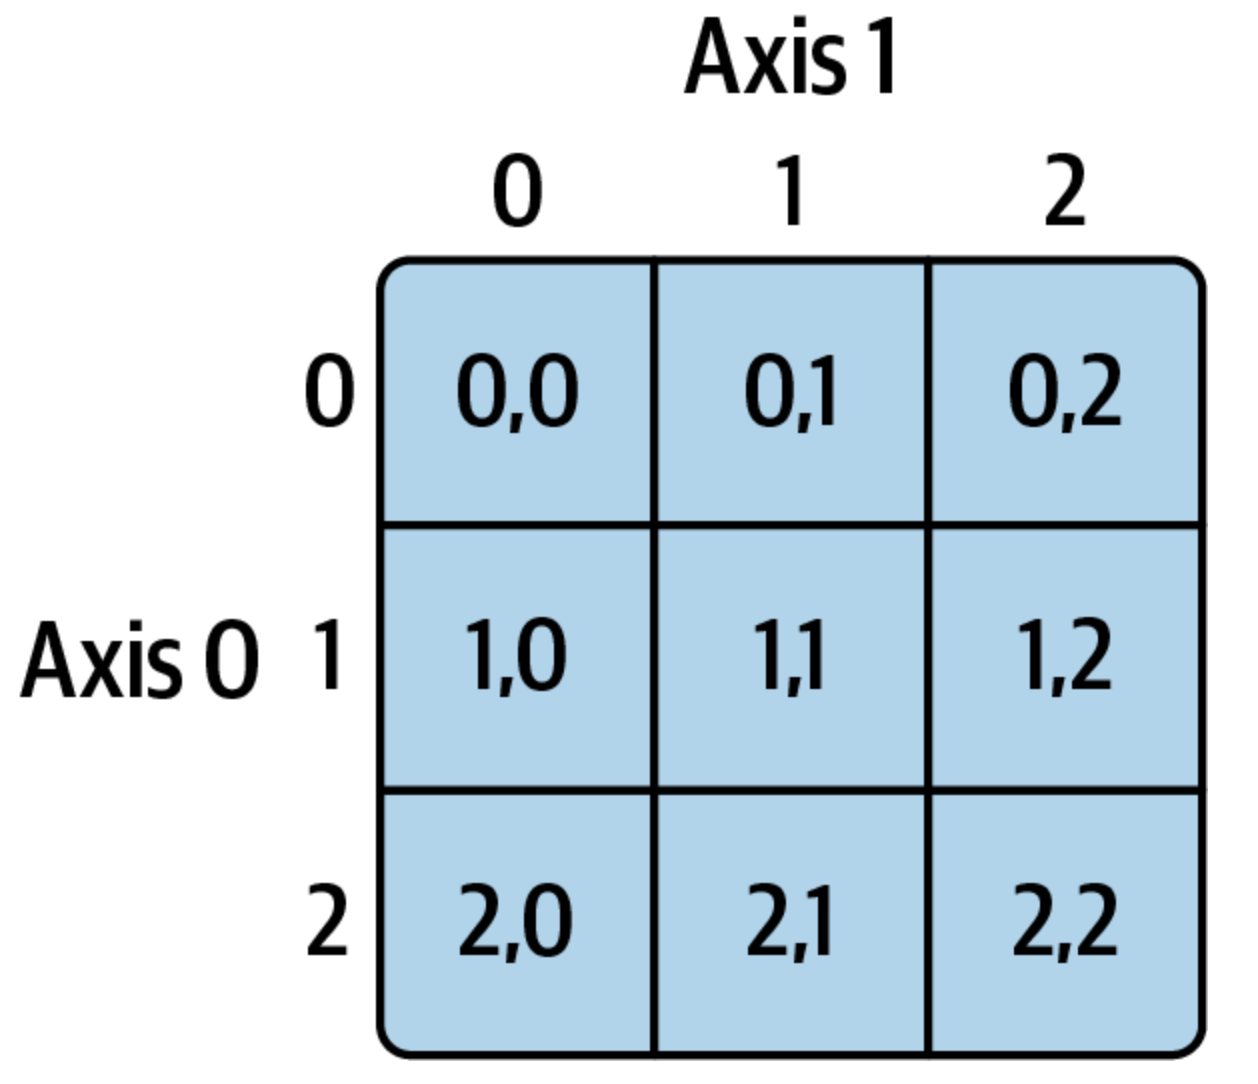
</div>

In [ ]:
x2

In [ ]:
x2[0]

In [ ]:
x2[0][0]

In [ ]:
# This multidimensional indexing syntax for NumPy arrays 
# will not work with regular Python objects, such as lists of lists
x2[0, 0]

In multidimensional arrays, if you omit later indices, the returned object will be a lower dimensional ndarray consisting of all the data along the higher dimensions

In [ ]:
x2[1]

In [ ]:
x2[2, -1]

In [ ]:
x2[0, 0] = 12
x2

In [ ]:
x3

In [ ]:
x3[0, 1, 0]

### Array Slicing: Accessing Subarrays
Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the slice notation, marked by the colon `(:)` character

```python
x[start:stop:step]
```

If any of these are unspecified, they default to the values `start = 0`, `stop = size of dimension`, `step = 1`. When the `step` values is negative, the defaults for `start` and `stop` are swapped. This becomes a convenient way to reverse an array

#### One-dimensional Subarrays

In [68]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x[:5]  # first five elements

In [ ]:
x[5:]  # elements after index 5

In [69]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [71]:
x[:] # bare slice [:] get the entire array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

In [73]:
x[1::2]  # every other element, starting at index 1

array([1, 3, 5, 7, 9])

In [ ]:
x[::-1]  # all elements, reversed

In [ ]:
x

In [70]:
x[5::-2]  # reversed every other from index 5

array([5, 3, 1])

In [ ]:
x[1:6] = 66
x

As you can see, if you assign a scalar value to a slice, as in `x[1:6] = 66`, the value is propagated (or broadcast henceforth) to the entire selection

#### Multi-dimensional Subarrays
Multi-dimensional slices work in the same way, with multiple slices separated by commas. You can pass multiple slices just like you can pass multiple indices. **When slicing like this, you always obtain the array of the same number of dimensions**

In [33]:
x2

array([[0, 0, 4, 1],
       [7, 3, 2, 4],
       [7, 2, 4, 8]])

In [34]:
x2[:2, :3]  # two rows, three columns

array([[0, 0, 4],
       [7, 3, 2]])

In [ ]:
x2[:3, ::2]  # all rows, every other column

In [35]:
x2[:, :1] # a : by itself means to take the entire axis

array([[0],
       [7],
       [7]])

In [79]:
x2[1::-1, ::]

array([[7, 3, 2, 4],
       [0, 0, 4, 1]])

#### Accessing Array Rows and Columns
One commonly needed routine is accessing of single rows or columns of an array. This can be done by combining indexing and slicing, using an empty slice marked by a single colon `(:)`. **By mixing integer indices and slices, you get lower dimensional slices**

In [37]:
x2

array([[0, 0, 4, 1],
       [7, 3, 2, 4],
       [7, 2, 4, 8]])

In [ ]:
x2[:, 0] # first column of x2

In [95]:
x2[0, :]  # first row of x2

array([0, 0, 4, 1])

In [ ]:
x2[0]  # equivalent to x2[0, :]

In [96]:
x2[:1, :4]

array([[0, 0, 4, 1]])

In [54]:
x2[1, :2] # one-dimensional

array([7, 3])

In [80]:
x2[1:2, :-1] # two-dimensional

array([[7, 3, 2]])

In multidimensional arrays, if you omit later indices, the returned object will be a lower dimensional ndarray consisting of all the data along the higher dimensions

In [ ]:
x3

In [ ]:
x3[0] #x3[0] is a 4 X 5 array

In [ ]:
x3[0, :, :]

In [ ]:
x3[0, ...]

Similarly `x3[1, 0]` gives you all the values whose indices start with `(1, 0)`, forming a 1-dimensional array

In [63]:
x3[1, 0]

array([6, 3, 0, 6, 4])

In [64]:
x3[1][0] # same effect

array([6, 3, 0, 6, 4])

In [65]:
x3[1, 0, :]

array([6, 3, 0, 6, 4])

In [66]:
x3[1, 0, ...]

array([6, 3, 0, 6, 4])

**Note that in all of these cases where a subsections of the array have been selected, the returned arrays are views**

In [67]:
x3[1, 0] = 99
x3

array([[[ 0,  7,  9,  3,  4],
        [ 6,  1,  5,  6,  2],
        [ 1,  8,  3,  5,  0],
        [ 2,  6,  2,  4,  4]],

       [[99, 99, 99, 99, 99],
        [ 7,  6,  7,  1,  5],
        [ 7,  9,  2,  4,  8],
        [ 1,  2,  1,  1,  3]],

       [[ 5,  9,  0,  8,  1],
        [ 6,  3,  3,  5,  9],
        [ 7,  9,  2,  3,  3],
        [ 3,  8,  6,  9,  7]]])

### Case Study

In [103]:
!pip3 install pillow

In [104]:
from PIL import Image

In [105]:
img = Image.open('fish.jpeg')

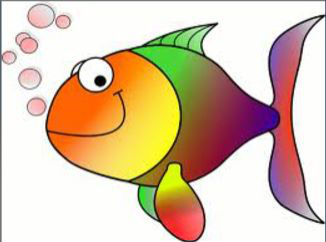

In [106]:
img

In [107]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [108]:
fish = np.array(img)
fish

array([[[ 90,  98, 101],
        [106, 114, 117],
        [130, 135, 138],
        ...,
        [112, 115, 120],
        [132, 135, 144],
        [ 67,  67,  79]],

       [[ 95, 103, 106],
        [148, 156, 159],
        [211, 216, 219],
        ...,
        [210, 213, 218],
        [209, 212, 221],
        [105, 105, 117]],

       [[ 79,  87,  90],
        [161, 169, 172],
        [250, 255, 255],
        ...,
        [252, 255, 255],
        [247, 250, 255],
        [114, 114, 126]],

       ...,

       [[116, 116, 114],
        [166, 166, 164],
        [253, 253, 251],
        ...,
        [250, 255, 255],
        [243, 252, 255],
        [110, 120, 129]],

       [[105, 105, 105],
        [179, 179, 179],
        [246, 246, 246],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [120, 120, 120]],

       [[114, 114, 114],
        [174, 174, 174],
        [234, 234, 234],
        ...,
        [255, 255, 255],
        [240, 240, 240],
        [125, 125, 125]]

In [109]:
# 1st -> height of the image, 2nd -> width
fish.shape

(242, 326, 3)

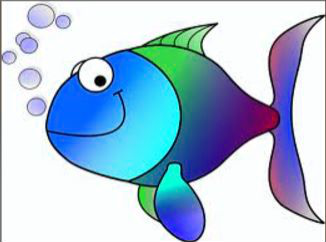

In [110]:
Image.fromarray(fish[:,:,::-1])

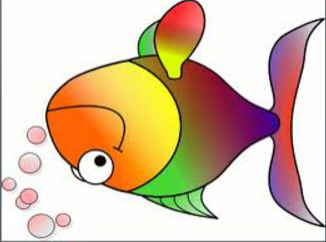

In [111]:
Image.fromarray(fish[::-1,:,:])

#### Multi-dimensional Slicing using Ellipsis `...`
The ellipsis syntax may be used to indicate selecting in full any remaining unspecified dimensions

In [ ]:
arr = np.arange(16)
arr

In [ ]:
arr = np.arange(16).reshape(2, 2, 2, 2)
arr

In [ ]:
arr[1, ...]

In [ ]:
arr[1]

In [ ]:
# ... is equivaleent to three :s
arr[1, :, :, :]

In [ ]:
arr[1, 1, ...]

In [ ]:
arr[1, 1]

#### Subarrays as No-copy View
- **NumPy array slices return views rather than copies of the array data. This is one area in which NumPy array slicing differs from Python list slicing**
- In Python lists, slices will be copies (shallow copy). This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer
- Though views are separate array objects, they save memory by sharing element data from other arrays
- If you need to explicitly copy the data within an array or a subarray, use the `copy()` method which creates a deep copy with independent copies of the original data

In [ ]:
s1 = [1, 2, 3, 4, 5, 6]

In [ ]:
s1_sub = s1[1:3]
s1_sub

In [ ]:
s1_sub[0] = 99
s1_sub

In [ ]:
s1

In [ ]:
s2 = [1, [2, 3], 3, 4, 5, 6]

In [ ]:
s2_sub = s2[1:2]
s2_sub

In [ ]:
s2_sub[0][0] = 99
s2_sub

In [ ]:
s2

In [82]:
x1

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ,
       -0.67888615, -0.09470897])

In [81]:
x1_sub = x1[1:3]
x1_sub

array([0.99734545, 0.2829785 ])

In [ ]:
x1_sub[0] = 99
x1_sub

In [ ]:
x1

In [ ]:
x2

In [ ]:
x2_sub = x2[:2, :2]
x2_sub

In [ ]:
x2_sub[0, 0] = 99
x2_sub

In [ ]:
x2

In [ ]:
x2_sub_copy = x2[:2, :2].copy() # ndarray method
x2_sub_copy

In [ ]:
x2_sub_copy[0, 0] = 42
x2_sub_copy

In [ ]:
x2

### Reshaping of Arrays
- The array method `reshape()` and `resize()` both enable you to change an array's dimensions
- Note that for this to work, the size of the initial array must match the size of the reshaped array
- Method `reshape()` returns a view of the original array with new dimensions
- **`reshape()` does not modify the original array while `resize()` does**. `resize()` changes shape and size of array in-place

In [ ]:
grid = np.arange(1, 19).reshape(3, 6)
print(grid)

In [ ]:
grid.shape = (3, 2, 3)
grid

In [ ]:
x = np.array([1, 2, 3])

# row vector via reshape
y = x.reshape(1, 3)

In [ ]:
x.shape

In [ ]:
x

In [ ]:
y.shape

In [ ]:
y

In [ ]:
y[0][0] = 99
y

In [ ]:
x

In [83]:
grades = np.array([[87, 96, 70], [100, 87, 90]])
grades

array([[ 87,  96,  70],
       [100,  87,  90]])

In [84]:
grades.reshape(1, 6)

array([[ 87,  96,  70, 100,  87,  90]])

In [ ]:
grades

In [ ]:
grades.resize(1, 6)

In [ ]:
grades

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix. This can be done with the reshape method, or more easily done by making use of the `newaxis` keyword within a slice operation. **NumPy arrays offer a special syntax for inserting new axes by indexing. We use the special `np.newaxis` attribute along with full slices to insert the new axis**

In [85]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [86]:
# row vector via newaxis
x[np.newaxis, :]

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [87]:
# column vector via reshape
x.reshape((3, 1))

ValueError: cannot reshape array of size 10 into shape (3,1)

In [88]:
# column vector via newaxis
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

### `flatten()` vs `ravel()`
- You can take a multidimensional array and flatten it into a single dimension with the methods `flatten()` and `ravel()`
- `flatten()` deep copies the orginal array's data
- `ravel()` produces a view of the original array, which shares the same data

In [89]:
grades = np.array([[87, 96, 70], [100, 87, 90]])
grades

array([[ 87,  96,  70],
       [100,  87,  90]])

In [90]:
flattened = grades.flatten()
flattened

array([ 87,  96,  70, 100,  87,  90])

In [ ]:
grades

In [92]:
flattened[0] = 100
flattened

array([100,  96,  70, 100,  87,  90])

In [93]:
grades

array([[ 87,  96,  70],
       [100,  87,  90]])

In [94]:
raveled = grades.ravel()
raveled

array([ 87,  96,  70, 100,  87,  90])

In [ ]:
grades

In [ ]:
raveled[0] = 99
raveled

In [ ]:
grades

### Transposing

- Transposing is a special form of reshaping that similarly returns a **view** on the underlying data without copying anything
- Transposing does not modify the original array

In [ ]:
arr = np.arange(15).reshape((3, 5))
arr

In [ ]:
arr1 = arr.T
arr1

In [ ]:
arr1[0, 0] = 99
arr1

In [ ]:
arr

In [ ]:
arr = np.arange(16)
arr

In [ ]:
# since arr is one-dimensional, the result is still one-dimensional
arr.T

In [ ]:
arr.shape

In [ ]:
# reshape arr to two-dimensional before transpose
arr.shape = (1, 16)
arr

In [ ]:
arr.T

In [ ]:
arr

### Array Concatenation
Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines `np.concatenate`, `np.vstack`, and `np.hstack`. `np.concatenate` takes a **tuple or list** of arrays as its first argument.

For working with **arrays of mixed dimensions**, it can be clearer to use the `np.vstack` (vertical stack) and `np.hstack` (horizontal stack) functions

In [127]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


In [100]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

# concatenate along the first axis
print(np.concatenate([grid, grid]))

[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]


In [125]:
# concatenate along the second axis (zero-indexed)
print(np.concatenate([grid, grid], axis = 1))

[[9 8 7 9 8 7]
 [6 5 4 6 5 4]]


In [126]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [128]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

### Array Splitting
To split arrays, use functions `np.split`, `np.hsplit`, and `np.vsplit`. For each of these, we can pass a **list** of indices giving the split points. Notice that `N` split-points, leads to `N + 1` subarrays.

In [129]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [120]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [119]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[9 8 7]
 [6 5 4]]
[]


In [121]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


### Repeating Elements `np.tile`
`np.tile` is a shortcut for stacking copies of an array along an axis. Visually you can think of it as being akin to laying down tiles

In [112]:
arr = np.random.rand(2, 2)
arr

array([[0.31496645, 0.8911091 ],
       [0.18033628, 0.4943162 ]])

In [113]:
# with a scalar as the second argument, the pattern is repeated horizontally
np.tile(arr, 2)

array([[0.31496645, 0.8911091 , 0.31496645, 0.8911091 ],
       [0.18033628, 0.4943162 , 0.18033628, 0.4943162 ]])

The second argument is the number of tiles. With a scalar, the tiling is made row by row, rather than column by column. The second argument to `np.tile` can be a tuple indicating the layout of the tiling

In [114]:
np.tile(arr, (2, 1)) # lay the tile 2 rows and 1 column

array([[0.31496645, 0.8911091 ],
       [0.18033628, 0.4943162 ],
       [0.31496645, 0.8911091 ],
       [0.18033628, 0.4943162 ]])

In [115]:
np.tile(arr, (3, 2)) # lay the tile 3 rows and two columns

array([[0.31496645, 0.8911091 , 0.31496645, 0.8911091 ],
       [0.18033628, 0.4943162 , 0.18033628, 0.4943162 ],
       [0.31496645, 0.8911091 , 0.31496645, 0.8911091 ],
       [0.18033628, 0.4943162 , 0.18033628, 0.4943162 ],
       [0.31496645, 0.8911091 , 0.31496645, 0.8911091 ],
       [0.18033628, 0.4943162 , 0.18033628, 0.4943162 ]])